In [67]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
from nltk.stem.porter import *
stemmer = PorterStemmer()
from functools import reduce
import random
import math
import unicodedata

In [3]:
%matplotlib inline

In [4]:
os.getcwd()

'H:\\Users\\noyana\\Documents\\Projects\\wordnik\\nbs'

In [5]:
with open('../clean_data/allTaggedItems-06Jan2019.json', 'rb') as f:
    tagitem = json.load(f)
with open('../clean_data/allTags-06Jan2019.json', 'rb') as f:
    alltags = json.load(f)


# todo: add lsited words too. But need to chop it into smaller files then process it
# memory is not enough to host all 2m listed words..

# todo: add user search and added in time word is looked up
        
    

In [6]:
tag_cnt = {tag_e['name']: int(tag_e['count']) for tag_e in alltags}
print('Number of tags', len(tag_cnt))

Number of tags 23005


In [63]:
alltags[0]

{'_id': '23835', 'name': 'hector', 'count': '1'}

In [65]:
tagitem[0]

{'_id': '1',
 'object_type': '1',
 'tag_id': '1',
 'created_at': '2009-12-05T05:44:49.000Z',
 'object_id': 'bug',
 'user_id': 'a321d8b405e3ef2604959847b36d171eebebc4a8941dc70a4784935a4fca5d5813de84dfa049f06549aa61b20848c1633ce81b675286ea8fb53db240d831c568'}

In [7]:
# most popular tags
sorted_tags = sorted(tag_cnt.items(), key=lambda kv: kv[1], reverse=True)
sorted_tags[0:99]

[('convowel', 4232),
 ('bird', 3084),
 ('misspelling', 1898),
 ('eee', 1217),
 ('food', 1183),
 ('offensive', 1046),
 ('informal', 1044),
 ('use carefully', 1040),
 ('impolite', 1038),
 ('plural', 950),
 ('nautical', 937),
 ('fish', 914),
 ('plant', 907),
 ('genus', 883),
 ('often misspelled', 830),
 ('ghosted', 816),
 ('cvccvc', 806),
 ('french', 777),
 ('British', 746),
 ('SATWOTD', 744),
 ('tulip', 743),
 ('tall bearded', 713),
 ('heraldry', 686),
 ('demon', 682),
 ('trademark', 682),
 ('insect', 681),
 ('phobia', 635),
 ('nickname', 629),
 ('italian', 618),
 ('latin', 616),
 ('monosyllable', 610),
 ('wotd', 600),
 ('word-of-the-day', 594),
 ('fabric', 593),
 ('euvocalic', 588),
 ('panvocalic', 582),
 ('spanish', 574),
 ('behead', 553),
 ('madeupical', 550),
 ('animal', 538),
 ('italy', 477),
 ('aaa', 467),
 ('love', 465),
 ('obsolete', 460),
 ('palynology', 454),
 ('fun to say', 447),
 ('anatomy', 443),
 ('maritime', 431),
 ('neologism', 428),
 ('cvccvcc', 427),
 ('cvccvcv', 420),


Text(0, 0.5, 'Number of tags')

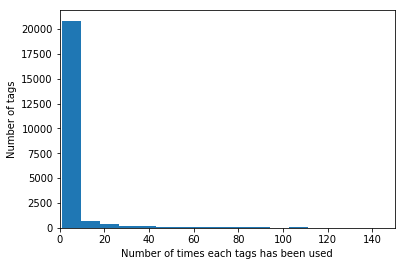

In [8]:
plt.hist(list(tag_cnt.values()), bins=500)
plt.xlim((0, 150))
plt.xlabel('Number of times each tags has been used')
plt.ylabel('Number of tags')

In [9]:
# least popular tags
sorted_tags[-100:-1]

[('metallic', 1),
 ('Alanis Morrisette', 1),
 ('sarcastic', 1),
 ('sarcasm', 1),
 ('doing it', 1),
 ('sexy time', 1),
 ('bumping uglies', 1),
 ('horizontal mambo', 1),
 ('doing the dirty', 1),
 ('fucking', 1),
 ('making love', 1),
 ('lovemaking', 1),
 ('drink the Kool-Aid', 1),
 ('fanatics', 1),
 ('give up your personal possessions', 1),
 ('brainwash', 1),
 ('brainwashing', 1),
 ('Jonestown', 1),
 ('religions', 1),
 ('British band', 1),
 ('throughout', 1),
 ('pervasive', 1),
 ('omnipresent', 1),
 ('everywhere', 1),
 ('end result', 1),
 ('execute', 1),
 ('bring off', 1),
 ('carry out', 1),
 ('accomplish', 1),
 ('ramification', 1),
 ('repercussion', 1),
 ('impact', 1),
 ('action', 1),
 ('foreignism', 1),
 ('difficult to pronounce', 1),
 ('Cervantes', 1),
 ('Don Quijote', 1),
 ('Don Quixote', 1),
 ('tilt at windmills', 1),
 ('tilting at windmills', 1),
 ('Sancho Panza', 1),
 ('poohpoohing', 1),
 ('pessimistic', 1),
 ('scornful', 1),
 ('cynic', 1),
 ('compared', 1),
 ('rhetorical', 1),
 ('

In [33]:
# build dictionaries that we will use later
raw_word_numtags = {}
for i in tagitem:
    word = i['object_id']
    raw_word_numtags[word] = raw_word_numtags.get(word, 0) + 1

In [34]:
print('Number of tagged items (words):',len(raw_word_numtags))

Number of tagged items (words): 124735


Text(0, 0.5, 'Number of words')

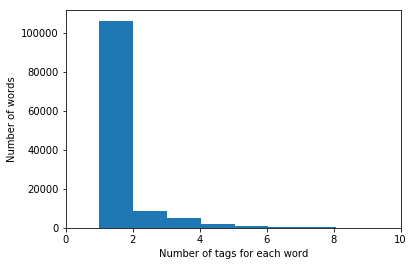

In [35]:
plt.hist(list(raw_word_numtags.values()), bins=200)
plt.xlim((0, 10))
plt.xlabel('Number of tags for each word')
plt.ylabel('Number of words')

In [66]:
tagid_name_map = {}

for e in alltags:
    tagid_name_map[e['_id']] = e['name']

A lot of duplicated words with same word but different variations

In [70]:
# alternatively we can store the tagIDs in a set, and count the length of the set at the end
word_numtags_map = defaultdict(list)
for i in tagitem:
    # get default word form
    word = stemmer.stem(i['object_id'])
    # replace all unicode space \xa0 with space
    word = unicodedata.normalize('NFKD', word) 
    # remove words that are not composed by alphabets (spaces are ok)
    #if len(re.sub('[a-z]|\s', '', word)) != 0:
    if len(re.sub('[0-9]|~|!|@|#|\$|%|\^|&|\*|\(|\)|-|_|\+|=|[|{|]|];|:|\"|\'|,|<|>|\.|\/|\?|\\\\|\|', '', word)) != len(word):
        continue
    tagid = i['tag_id']
    
    try:
        tname = tagid_name_map[tagid]
    except:
        tname = 'void'
    word_numtags_map[word].append(tname)

In [71]:
word_numtags_map['schadenfreud']

['misspelling',
 'hate hate hate',
 'the s-word',
 'stabby',
 'nfuwe',
 'german',
 'tip of the tongue',
 'schadenfreude alternative',
 'german words for abstract concepts',
 'german',
 'cccvcvcccvvcv',
 'borrowed word',
 'Avenue Q',
 'emotion',
 'surprising pronunciation',
 'popular',
 'Detroit',
 'Detroit',
 'negative',
 'loanword',
 'ppwp_shouldknow',
 'void']

Number of tagged items: 101148


(0, 10)

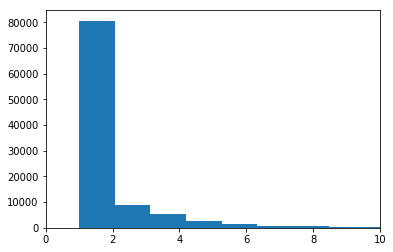

In [61]:
print('Number of tagged items:',len(word_numtags_map))
plt.hist(list(word_numtags_map.values()), bins=200)
plt.xlim((0, 10))

In [72]:
# load training set
with open('train_listed_words.json', 'rb') as f:
    train_listed_words = json.load(f)
with open('test_listed_words.json', 'rb') as f:
    test_listed_words = json.load(f)


In [76]:
train_tags = []
train_listed_words_flat = []
for userid in train_listed_words:
    for wid in train_listed_words[userid]:
        wordlist = train_listed_words[userid][wid]
        wordlist_tags = []
        for w in wordlist:
            wordlist_tags.extend(word_numtags_map[w])
        train_tags.append(wordlist_tags)
        train_listed_words_flat.append(wordlist)

In [74]:
len(train_tags)

39875

In [78]:
len(train_listed_words_flat)

39875

In [79]:
train_listed_words_flat[0]

['phatic',
 'macerate',
 'amanuenses',
 'theophagy',
 'seraglio',
 'geophagy',
 'metaphone',
 'anastrophe',
 'neologism',
 'tetragrammaton',
 'ablutophobia',
 'picayune',
 'colophon',
 'huzzah',
 'embiggen',
 'steganography',
 'breezer',
 'consigliere',
 'polari',
 'mook',
 'synechdoche',
 'shrubbery',
 'interrobang',
 'nychthemeron',
 'lagniappe',
 'piss and vinegar',
 'poetaster',
 'shoegazer',
 'errata',
 'bollocks',
 'bookmarklet',
 'titification',
 'psychopomp',
 'gloaming',
 'dirigible',
 'twee',
 'epeolatry',
 'strappleberry',
 'hemidemisemiquaver',
 'prepicenter',
 'faineant',
 'misandrist',
 'festivus',
 'cephalophore',
 'noosphere',
 'taw',
 'fulking',
 'ghoti',
 'bracket',
 'smurph',
 'refenestration',
 'westing',
 'provocateur',
 'pate',
 'john',
 'clown',
 'poutine',
 'hierophant',
 'bivy',
 'nonce',
 'natches',
 'bummalo',
 'entomologist',
 'etymologist',
 'headword',
 'rfe',
 'mitzvah',
 'anhedonia',
 'piker',
 'surcease',
 'hedcut',
 'transom',
 'gyrovague',
 'frickin',

In [75]:
train_tags[0]

['ccvcvc',
 'cvcvccvv',
 'bible',
 'void',
 'phobia',
 'wordnik',
 'printing',
 'books',
 'ooo',
 'colophon',
 'cvccvc',
 'ua',
 'The Simpsons',
 'The Simpsons',
 'cromulent',
 'star',
 'astronomy',
 'mark ward',
 'punctuation',
 'bangy things',
 'vccvccvcvcc',
 'ppwp_funtosay',
 'ampersand',
 'time',
 'filler',
 'chth',
 'cvccccvcvcvc',
 'plural',
 'meta',
 'plural',
 'ghosted',
 'Tweedledee',
 'Tweedledum',
 'trait',
 'cvvcvvcc',
 'wotd',
 'word-of-the-day',
 'void',
 'void',
 'ccvcv',
 'photography',
 'neologism',
 'plural',
 'third person indicative singular',
 'meta',
 'digital photography',
 'gambling',
 'mining',
 'ccvccvcc',
 'punctuation',
 'tax',
 'ccvccvc',
 'blue',
 'anger',
 'anatomy',
 'plural',
 'ghosted',
 'candidate for wordie mascot',
 'username',
 'teapot',
 'likes Clamato',
 'john',
 'cvcc',
 'cvcc',
 'void',
 'terrifying',
 'Othello',
 'The Winters Tale',
 'fish',
 'cvccvcv',
 'void',
 'dictionary',
 'Hebrew',
 'an-',
 'ana-',
 'vccvcvcvv',
 'australian slang',
 'b

In [81]:
word_numtags_map['yo la tengo']

[]

In [62]:
cnts = list(word_numtags_map.values())
greater_than_1_cnts = list(filter(lambda x: x > 1, cnts))
print('Number of words with greater than 1 tags is', len(greater_than_1_cnts), 'which is',len(greater_than_1_cnts)/len(cnts), 'out of', len(cnts), 'total number of stemmed words')

Number of words with greater than 1 tags is 39778 which is 0.39326531419306365 out of 101148 total number of stemmed words


In [20]:
# build reverse mapping
numtags_word_map = {} # basically reverse of st_word_numtags
for w, cnt in word_numtags_map.items():
    numtags_word_map[cnt] = numtags_word_map.get(cnt, []) + [w]


In [26]:
sorted_cnt = sorted(numtags_word_map.items(), key=lambda kv: kv[0], reverse=True)
sorted_cnt[0:10]

[(214, ['admir']),
 (201, ['about']),
 (197, ['adobeair']),
 (195, ['addon']),
 (96, ['nectareousraconteusenectarouscourtesan']),
 (58, ['love']),
 (53, ['overtag']),
 (49, ['red']),
 (48, ['divers']),
 (45, ['object'])]

In [13]:
def get_sim_pop_word(word_list, word_numtags_map, numtags_word_map, num_words = 1):
    """
    Return list of words that has same popularity of the input word list
    Args:
    word_list - the list of words user creates
    num_words - the number of suggested words returned by this function
    word_numtags_map - the word to number of tags map
    numtags_word_map - the number of tags to word map
    
    Returns:
    suggested_words - list of words
    """
    word_pop = list(map(lambda w: word_numtags_map.get(w, 0), word_list))
    avg_list_pop = reduce(lambda x, y: x+ y, word_pop)/len(word_list)
    ceil_avg = math.ceil(avg_list_pop) 
    print('average word list popularity', ceil_avg)
    
    # todo: probably can do better than to force it to 1. aka find most similar popularity count
    if ceil_avg not in numtags_word_map.keys():
        ceil_avg = 1 
    # todo: use other mechanims say word2vec, most recent popular word to select words
    suggested_words = random.sample(numtags_word_map[ceil_avg], num_words)
    
    return suggested_words
    

In [14]:
test_t2w = {1: ['bathyspher', 'bidarka', 'crossjack'], 8: ['catboat', 'bugs'], 2: ['deadnip', 'clew-garnet', 'chesstre']}
test_w2t = {'bathyspher': 1, 'bidarka': 1, 'crossjack': 1, 'catboat': 8, 'bugs': 8, 'deadnip': 2, 'clew-garnet':2, 'chesstre':2}
test_wl = ['bathyspher']

get_sim_pop_word(test_wl, test_w2t, test_t2w, num_words = 1)

average word list popularity 1


['bidarka']

In [7]:
# todo: test it with user_lookup
import re
word = 'test word doing stuff'
re.sub('[a-z|\s]+', '', word)

''